# Credit Card Default

We are going to use classification method to classify two two-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Credit Card Default Detection Case where you will classify two multiple-feature groups.

**Data Description:**


**id**: A unique Id field which represents a customer

**X1**: Credit line

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.

**X12- X17**: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is default (1) or not (0).

This is a real problem to classify multi-feature data into two groups.



## 1. Load the data

* Import pandas and matplotlib as our main tool for later analysis
* Perform data quality check, including data values, data types, missing values and so on

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
credit_card_raw_data = pd.read_csv("./raw_data.csv")
print (credit_card_raw_data.shape)

(25000, 25)


In [4]:
credit_card_raw_data.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [5]:
from sklearn.model_selection import train_test_split
Y = credit_card_raw_data['Y']
X = credit_card_raw_data.drop(['Y', 'id'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [6]:
x_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
6617,100000,1,2,1,35,0,0,0,0,0,...,79755,81209,60720,74375,4000,3000,3004,2278,15000,3000
16547,120000,1,2,1,47,-1,-1,-1,0,0,...,2853,2896,1149,1758,260,5753,1153,3,1759,4084
16196,50000,2,3,2,42,0,0,0,0,0,...,48803,46472,19766,19761,2019,2063,2217,705,725,927
11646,150000,2,2,1,37,0,0,0,0,0,...,121570,130780,130780,0,10109,10000,10000,10000,20000,16100
3203,50000,2,1,2,23,0,0,0,0,0,...,13734,14754,16499,18223,1500,4000,1255,2000,2000,3000


In [7]:
y_train.head()

6617     0
16547    1
16196    0
11646    0
3203     0
Name: Y, dtype: int64

In [8]:
# join x_train and Y_tain to get the train_data
train_data = pd.merge(x_train, y_train, left_index=True, right_index=True)
train_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
6617,100000,1,2,1,35,0,0,0,0,0,...,81209,60720,74375,4000,3000,3004,2278,15000,3000,0
16547,120000,1,2,1,47,-1,-1,-1,0,0,...,2896,1149,1758,260,5753,1153,3,1759,4084,1
16196,50000,2,3,2,42,0,0,0,0,0,...,46472,19766,19761,2019,2063,2217,705,725,927,0
11646,150000,2,2,1,37,0,0,0,0,0,...,130780,130780,0,10109,10000,10000,10000,20000,16100,0
3203,50000,2,1,2,23,0,0,0,0,0,...,14754,16499,18223,1500,4000,1255,2000,2000,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22521,420000,1,1,1,47,-2,-2,-2,-2,-2,...,52294,0,0,84459,79192,57145,0,0,0,0
17048,30000,1,2,2,39,2,4,3,2,2,...,23930,28807,27781,0,0,0,5288,0,0,1
23924,110000,2,2,1,33,0,0,0,0,0,...,112510,112319,110730,6000,5500,4000,4000,4100,4000,0
23605,170000,1,1,1,40,0,0,0,0,0,...,169821,173014,163570,7540,7540,6301,6517,6035,6435,0


In [9]:
# join x_test and Y_test to get the test_data
test_data = pd.merge(x_test, y_test, left_index=True, right_index=True)
test_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
5262,120000,1,2,2,26,0,0,0,0,0,...,92346,88542,80225,6159,10008,3051,3100,3052,2908,1
22764,100000,2,2,2,26,0,0,-2,-2,-2,...,0,0,16708,0,0,0,0,16708,2000,0
2633,700000,1,2,1,50,0,0,0,0,0,...,174189,121717,124040,10000,8500,7093,4500,4100,4100,0
22512,20000,1,1,2,23,1,-2,-2,-2,-2,...,-1518,-1518,-1518,0,0,0,0,0,0,1
19404,50000,2,1,2,24,0,0,0,-1,-1,...,13676,9457,390,27704,5000,13676,9457,14000,568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,30000,1,1,2,36,0,0,0,0,2,...,27400,26823,28621,1500,1500,4200,0,2252,0,0
6691,100000,2,2,1,40,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19549,90000,2,1,1,36,-1,-1,-2,-2,-2,...,0,0,1980,0,0,0,0,1980,0,0
9523,450000,2,1,2,28,-1,-1,-1,-1,-1,...,1346,1448,4005,0,14500,1346,1448,4005,166,0


In [10]:
# check the column names in the dataframe
train_data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [11]:
# check the data of history payments
train_data.iloc[0:10,5:11]

,X6,X7,X8,X9,X10,X11
6617,0,0,0,0,0,0
16547,-1,-1,-1,0,0,-1
16196,0,0,0,0,0,0
11646,0,0,0,0,0,0
3203,0,0,0,0,0,0
14521,3,2,0,0,0,0
10089,-1,-1,-1,-1,0,0
14063,0,0,0,0,0,0
16781,-2,-2,-2,-2,-2,-2
4892,2,2,2,2,2,2


In [12]:
# check all the data types of the columns
train_data.dtypes

X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [13]:
# check the missing value situation
train_data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

## 2. Distinguish categorical and continuous variables

* Separating the categorical features and continuous features will allow us to perform
different data processing methods to the data later

In [14]:
threshold = 15

cat_v = [] # setup an empty list to put categorical column names 
con_v = [] # setup an empty list to put continuous column names 
for c in train_data.columns: # for each column in columns
    if len(train_data[c].value_counts().index)<=threshold: # if the number of unique values in this column is less than a threshold
        cat_v.append(c) # put it in the categorical column name list
    else: 
        con_v.append(c) # put it in the continuous column name list
cat_v.remove('Y') # in the categorical column list, we want to remove the target variable
target = ['Y'] # and assign a dedicated list to put the target variable

In [15]:
# check the output of the code above

print("The continuous variables: ", con_v, "\n")
print("The categorical variables: ", cat_v)

The continuous variables:  ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'] 

The categorical variables:  ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


## 3. Basic feature analysis

i. Check the pattern differences between the training data and testing data
    * The reason why we want to do this is that we always want to make sure that the features/variables in the 
    training and testing set are draw from the same distribution. Only when that's true, we can apply whatever
    machine learning algorithm on the data set. Otherwise, it would just make no sense to us to apply 
    any analysis on the data

In [16]:
train_data[cat_v[1]].value_counts()

2    9325
1    7031
3    3341
5     178
4      81
6      35
0       9
Name: X3, dtype: int64

In [17]:
train_data[cat_v[1]].value_counts().index

Int64Index([2, 1, 3, 5, 4, 6, 0], dtype='int64')

In [18]:
train_data[cat_v[1]].value_counts().values

array([9325, 7031, 3341,  178,   81,   35,    9], dtype=int64)

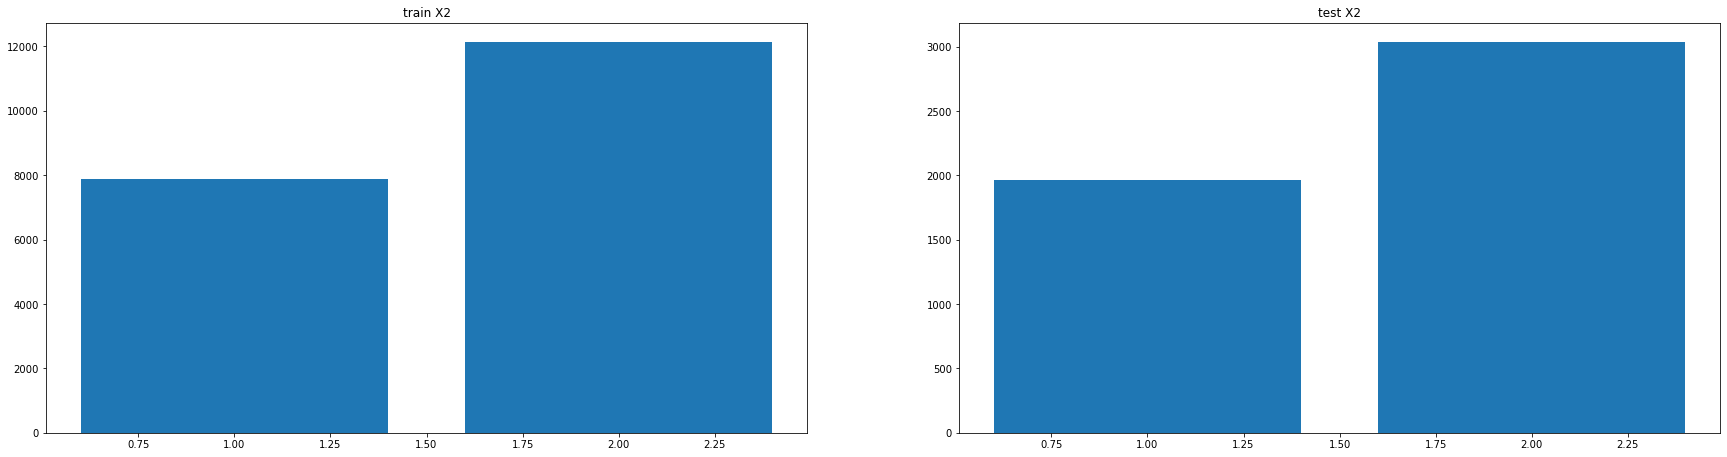

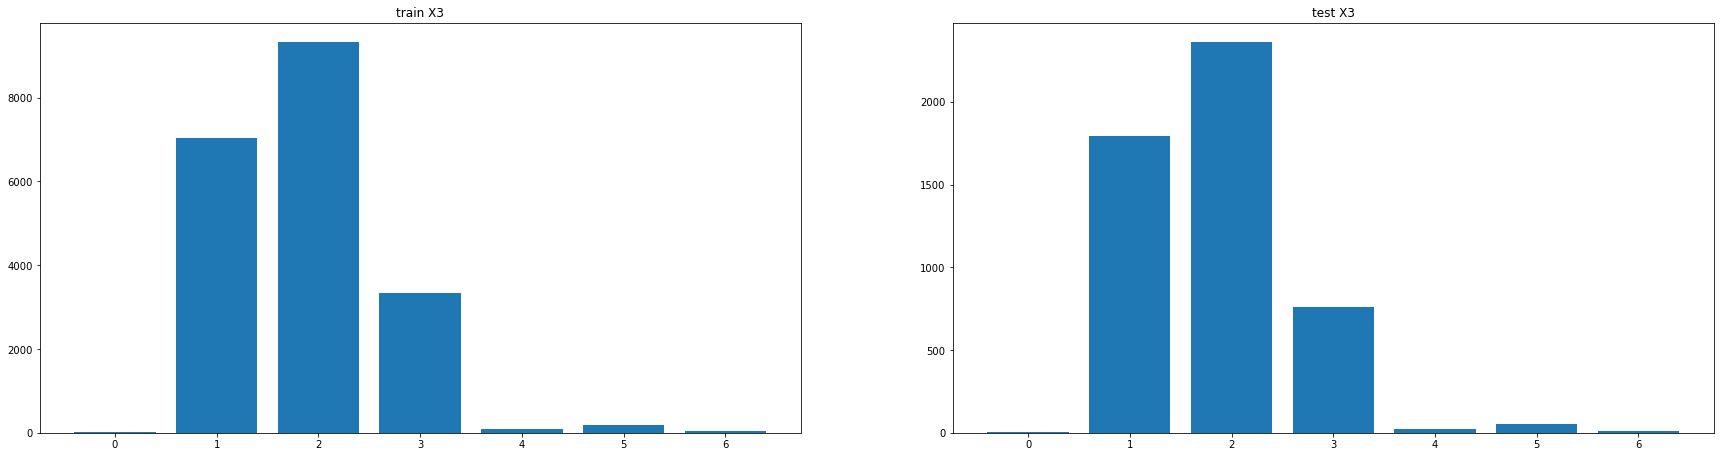

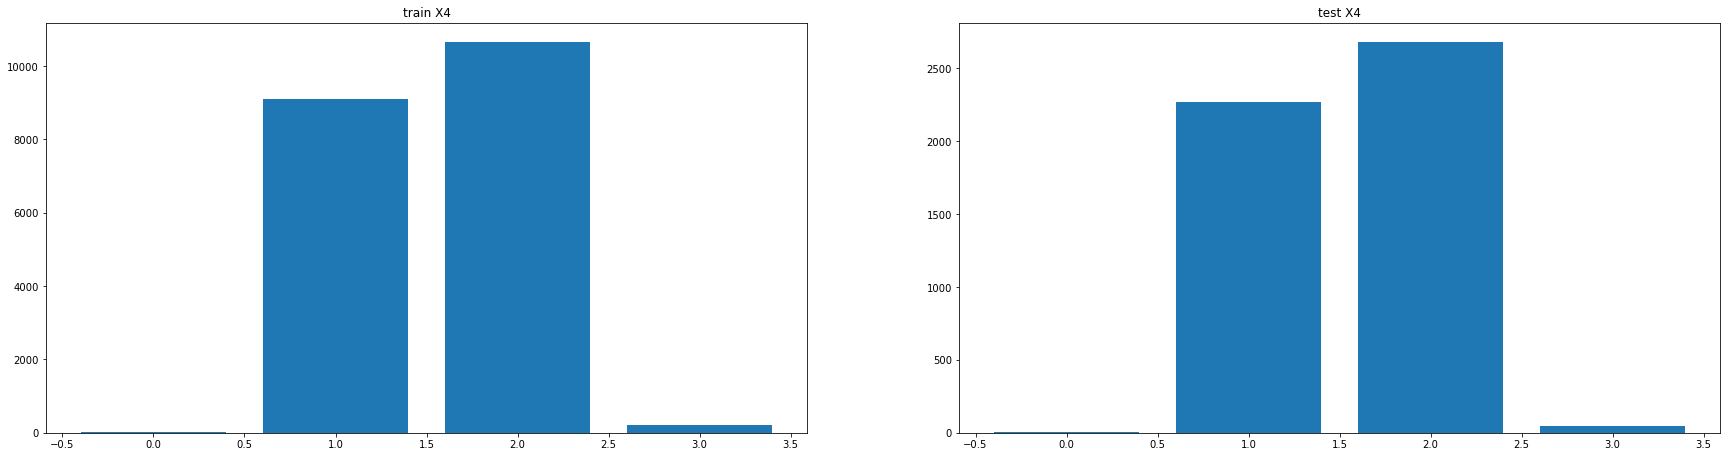

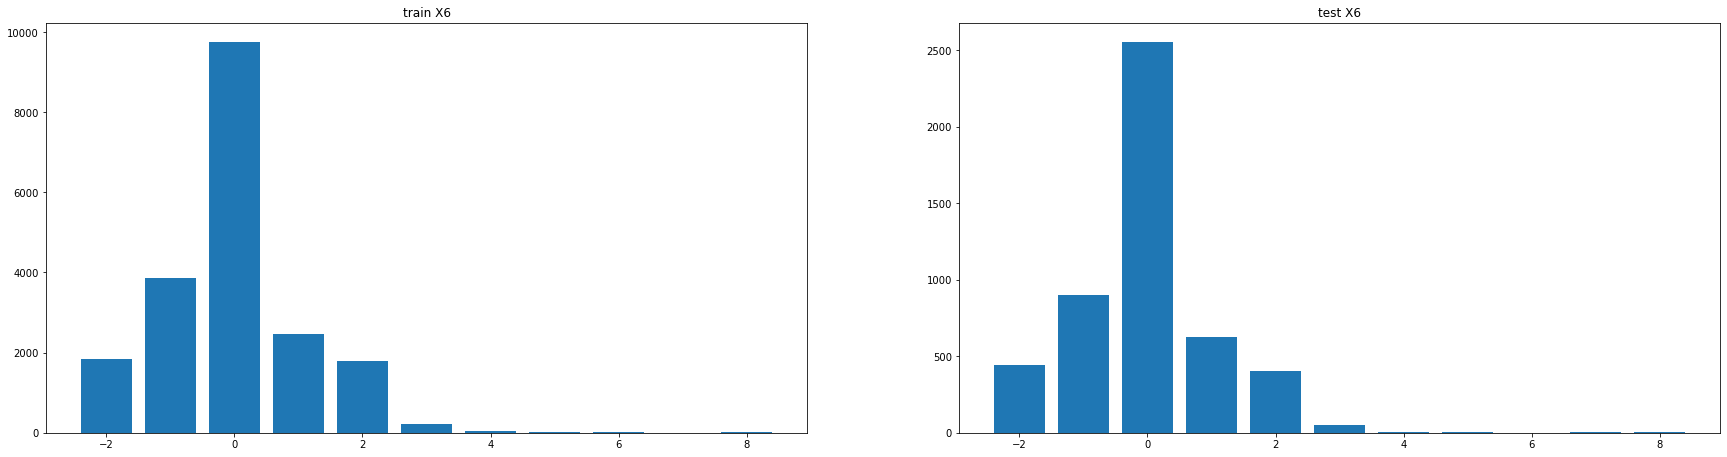

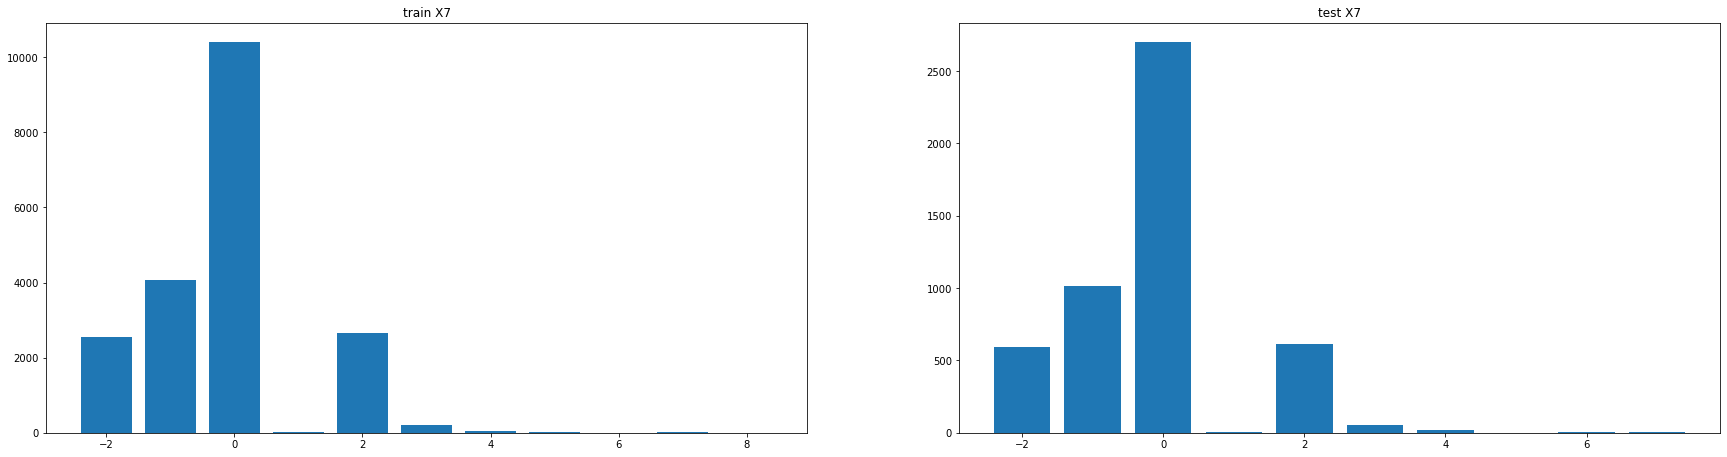

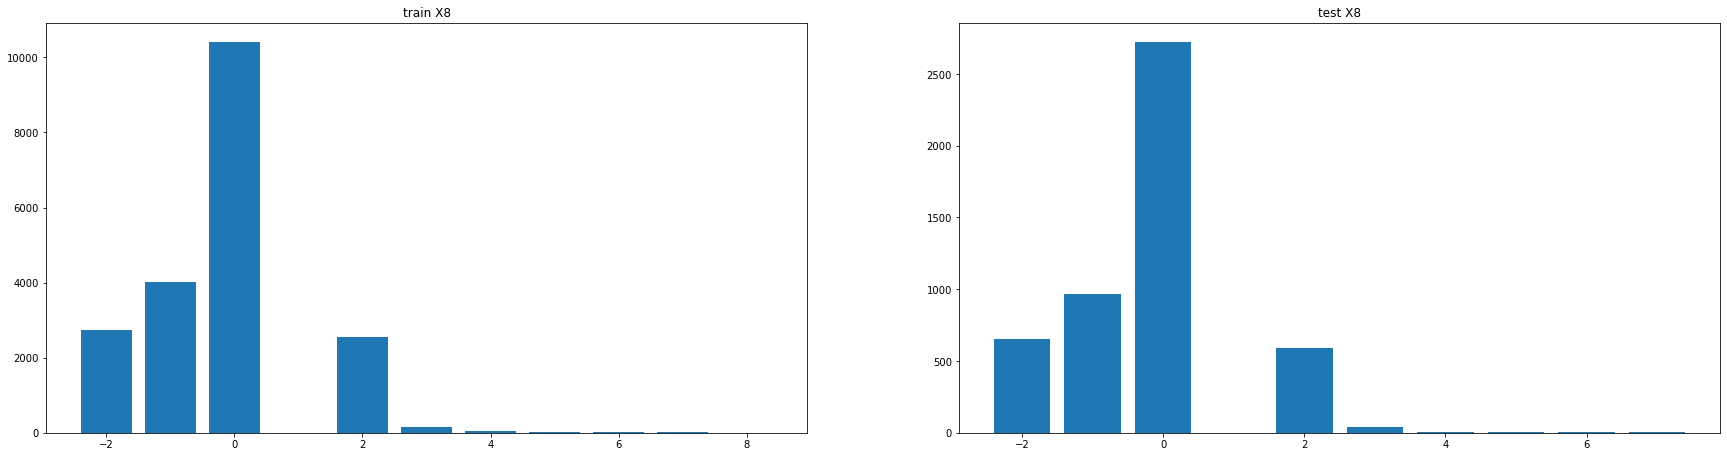

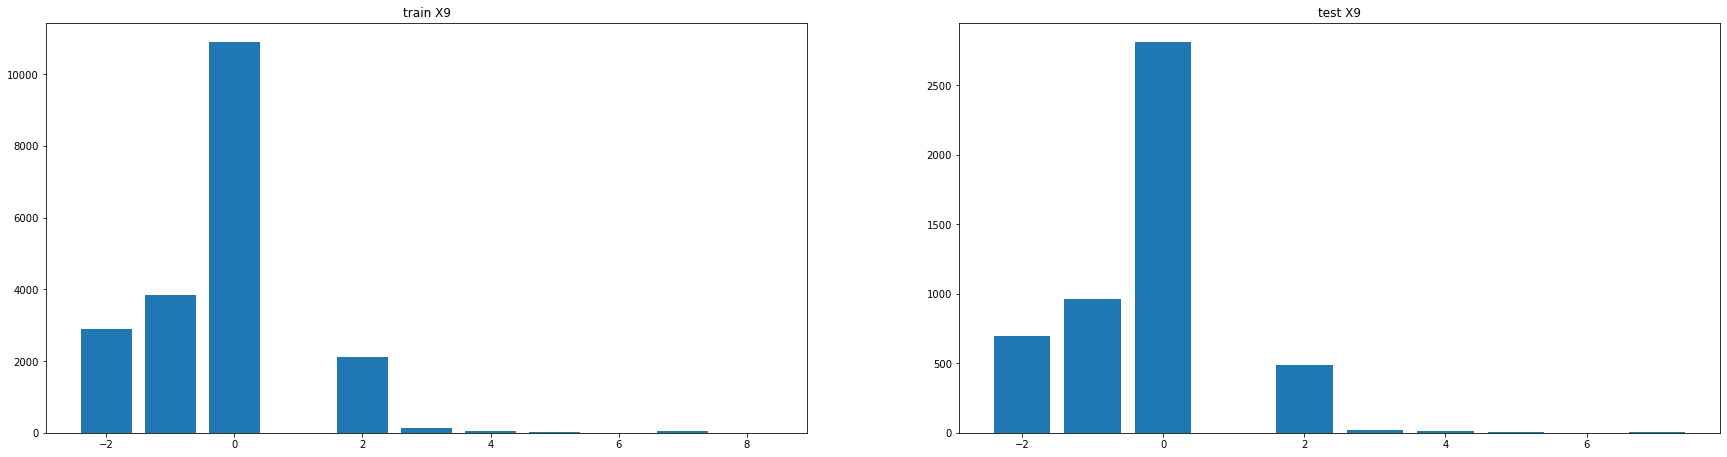

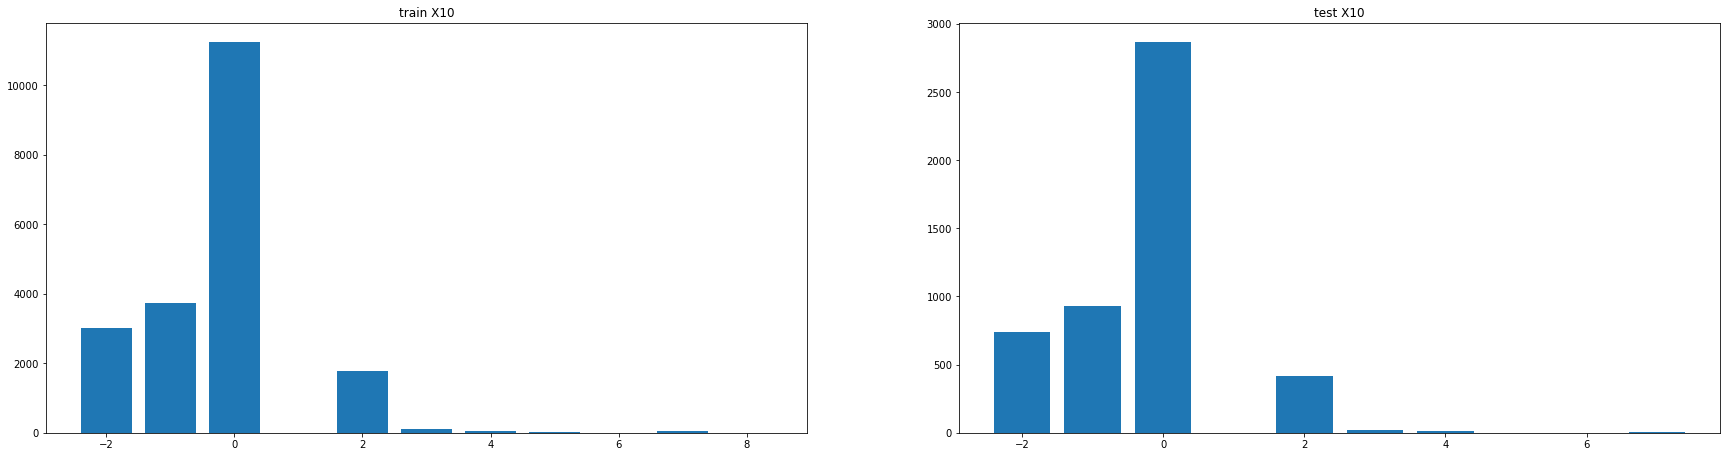

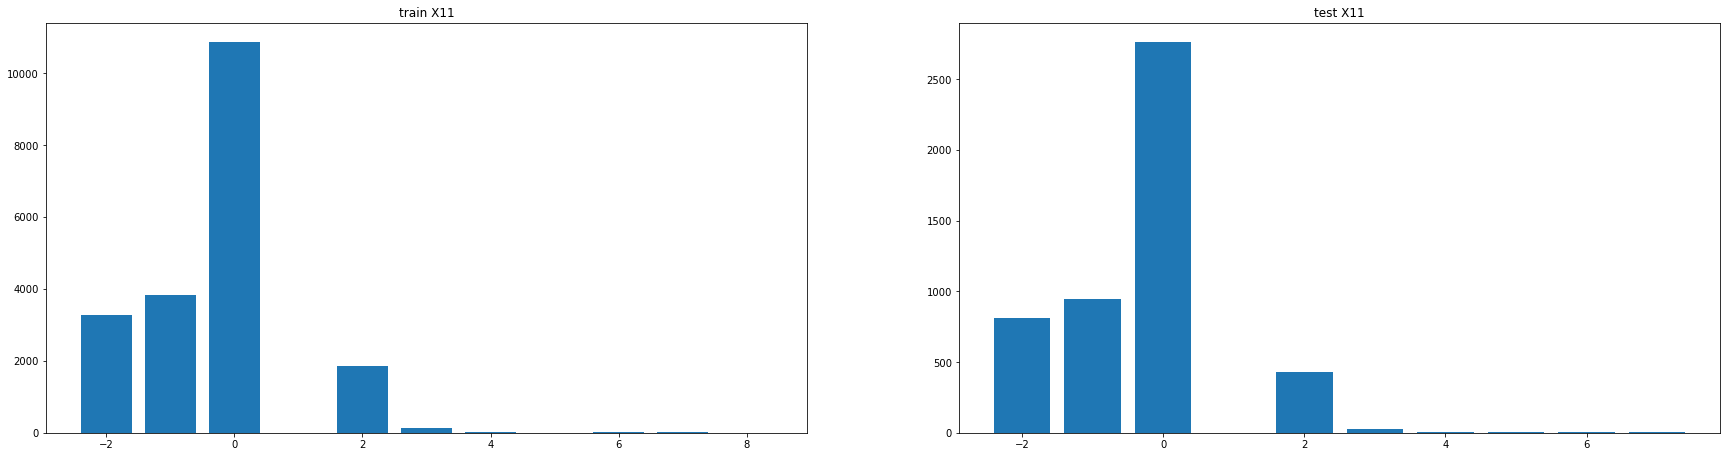

In [19]:
# visualize the distribution of the categorical columns 

count=1 # setup a counter to tell the index of the current plot

for i in range(len(cat_v)): # for each column in the categorical columns
    fig = plt.figure(figsize=(30,80)) # setup a "canvas" with size 30, 80
    plt.subplot(len(cat_v),2,count) # first plot the left one in the current row
    plt.bar(train_data[cat_v[i]].value_counts().index, train_data[cat_v[i]].value_counts().values) # bar plot takes in two major parameters, first for the x axis, second for the y axis
    plt.title("train "+cat_v[i]) # give the bar plot a title
    
    plt.subplot(len(cat_v),2,count+1) # plot the right one in the current row
    plt.bar(test_data[cat_v[i]].value_counts().index, test_data[cat_v[i]].value_counts().values) # similar with the first one, only use the test data
    plt.title("test "+cat_v[i]) # give the bar plot a title
    count+=2 # plus two to the counter variable letting it know that we've already plottd two

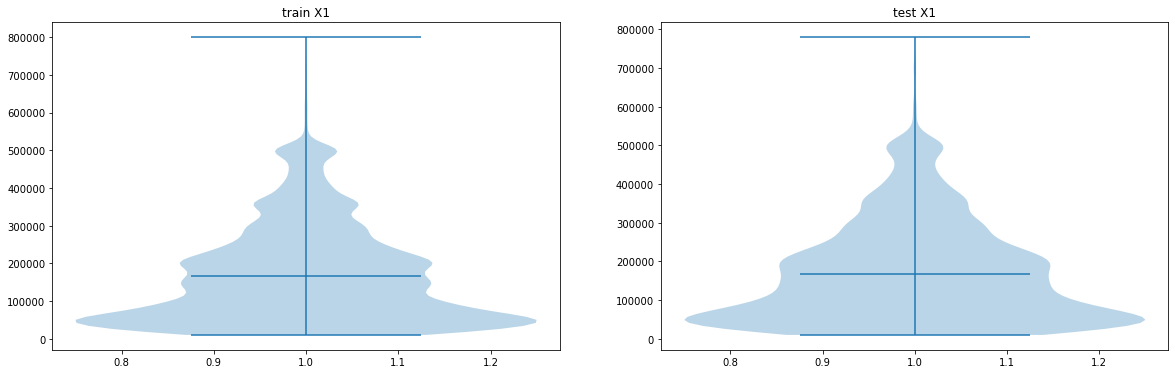

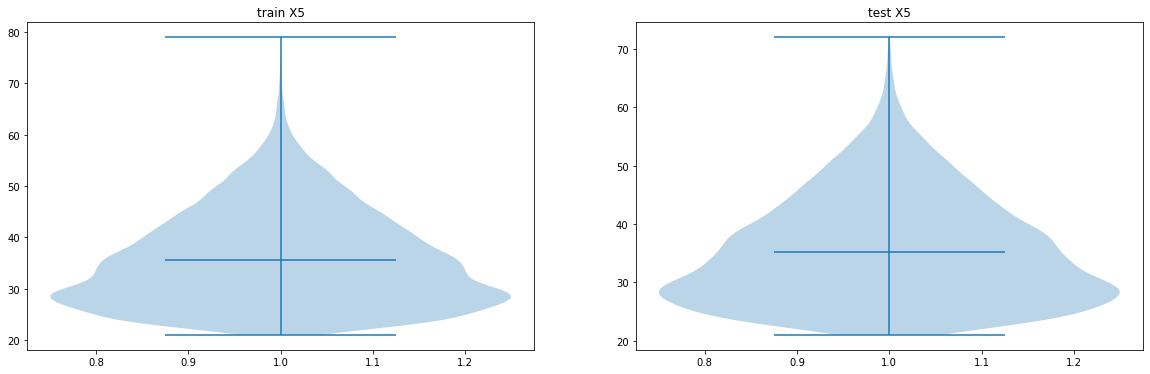

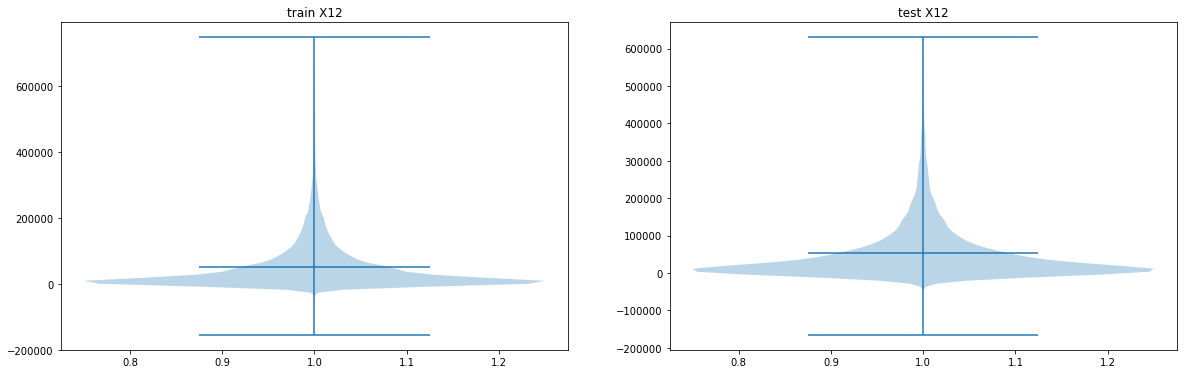

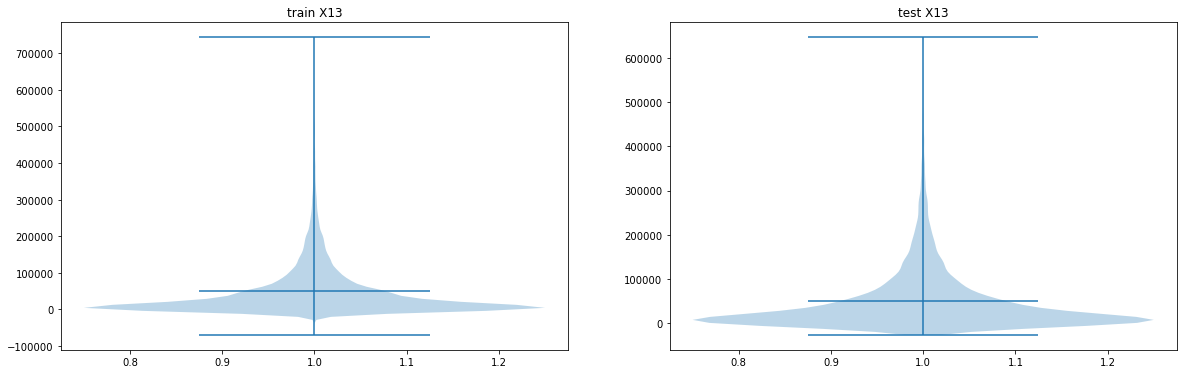

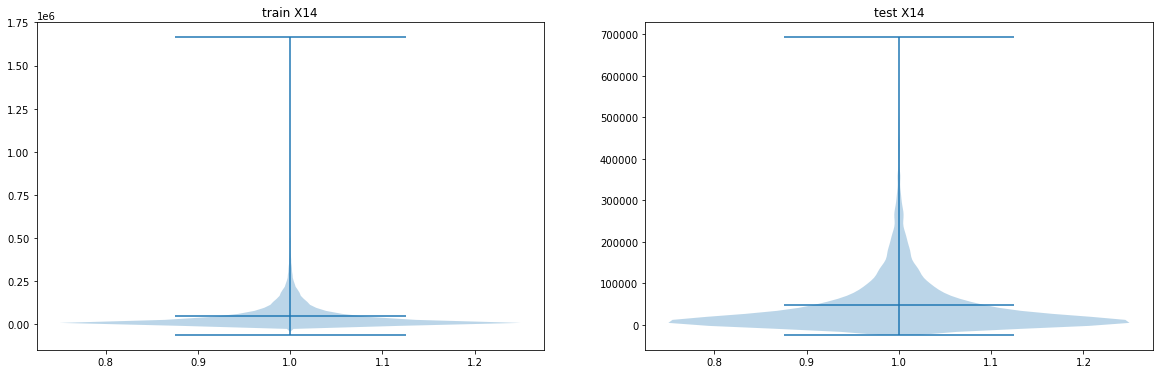

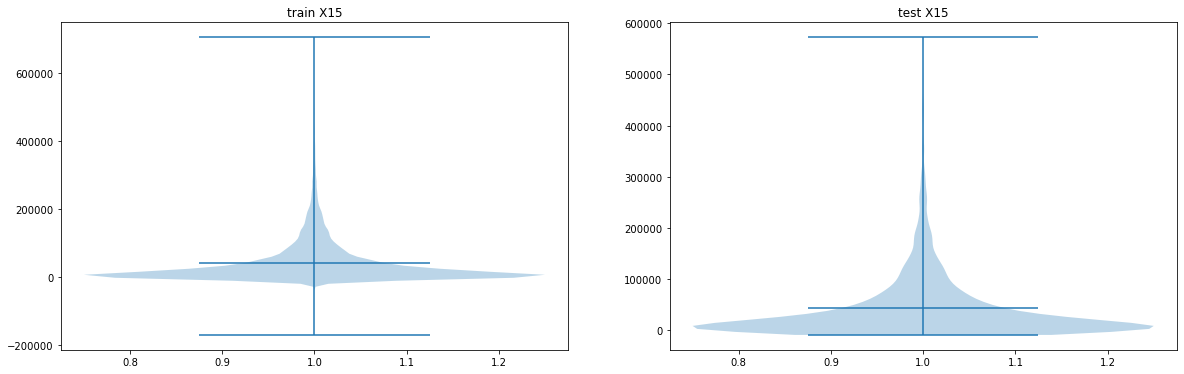

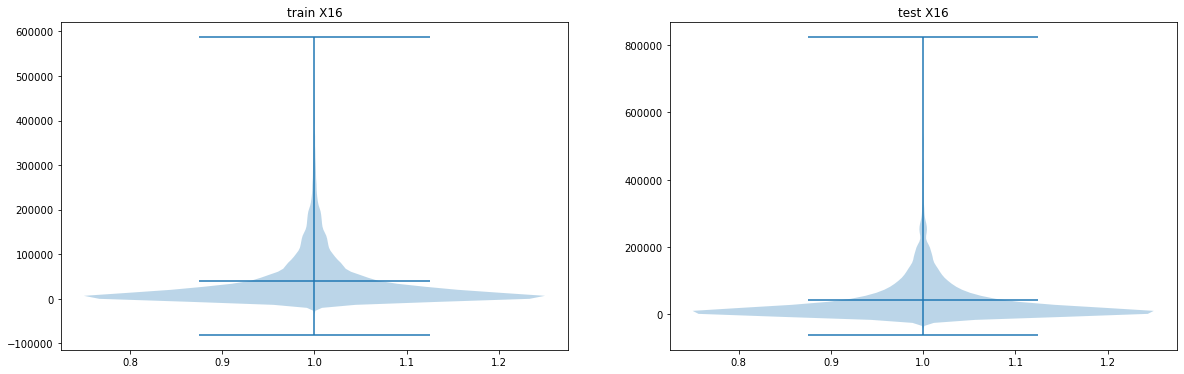

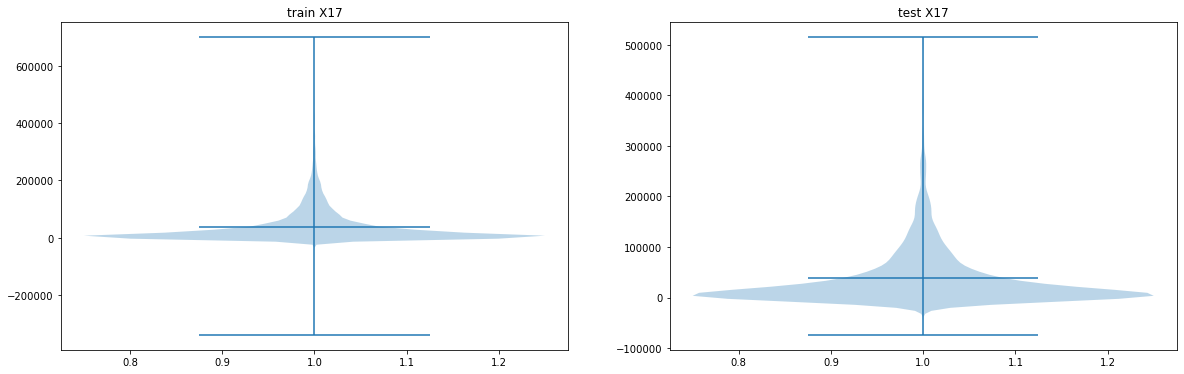

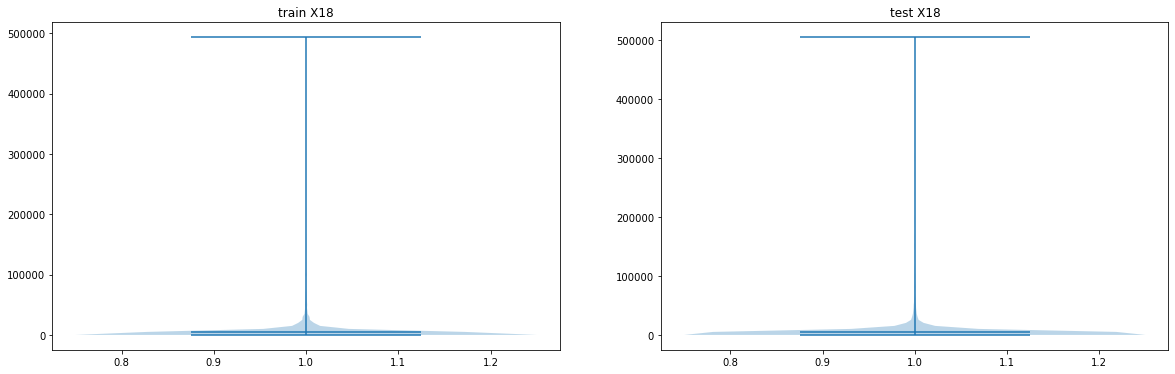

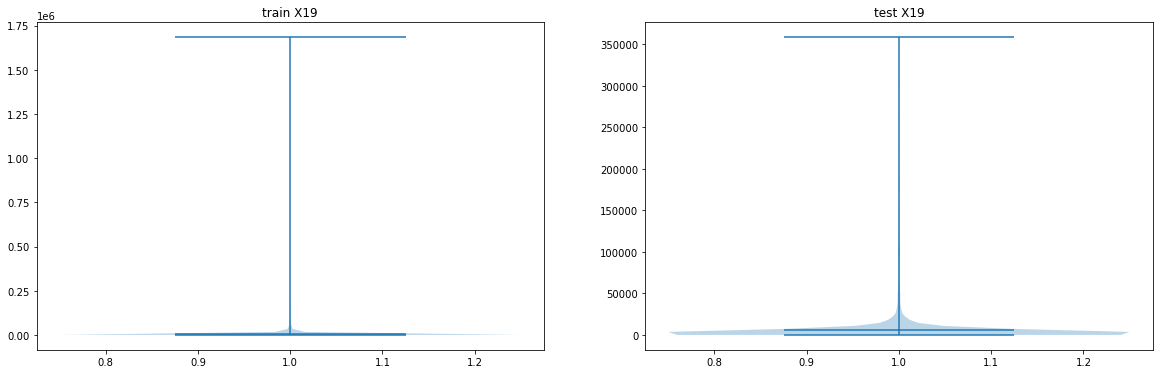

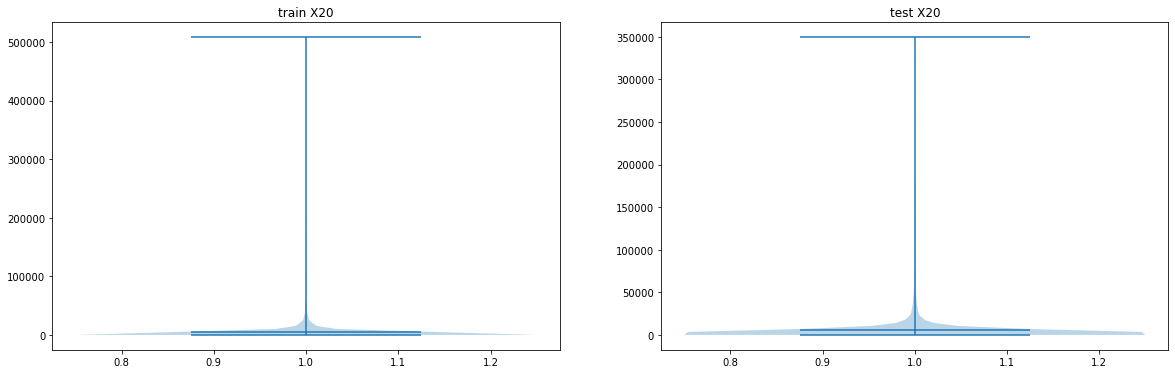

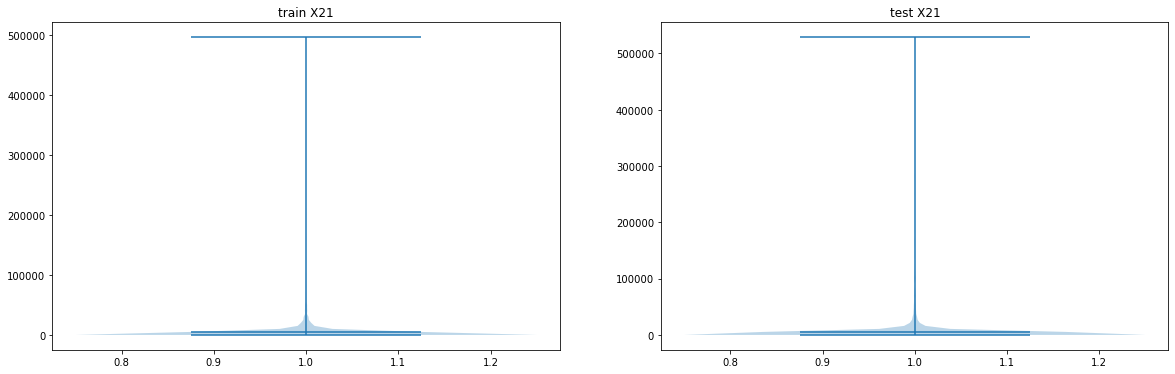

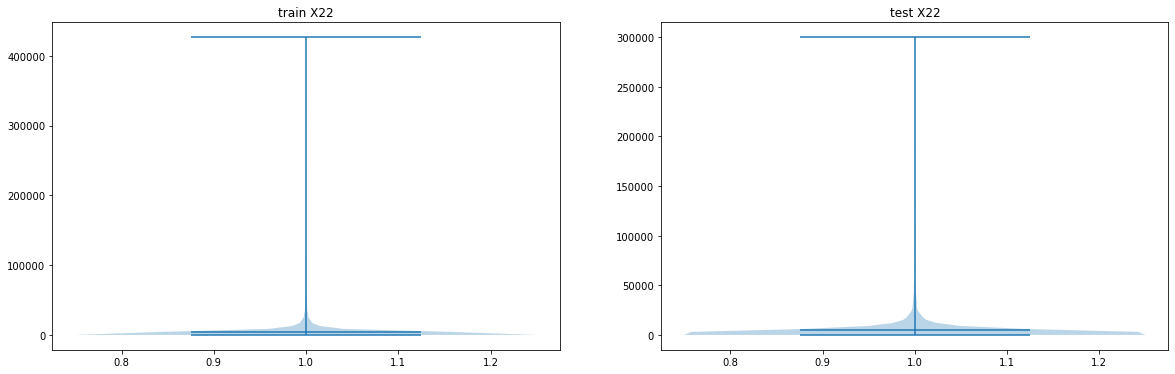

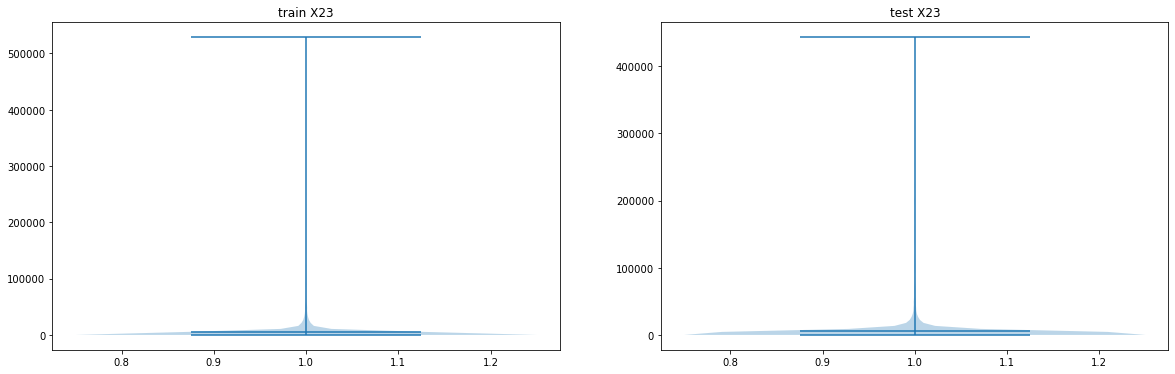

In [20]:
# visualized the continuous variables, similar with the code above
# only this time we would use violin plot here

count=1
for i in range(len(con_v)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(con_v),2,count)
    plt.violinplot(train_data[con_v[i]],showmeans=True) # use violin plot to visualize the continuous variables, this time we only need to pass in one major param which is the data itself
    plt.title("train "+con_v[i])
    
    plt.subplot(len(con_v),2,count+1)
    plt.violinplot(test_data[con_v[i]],showmeans=True)
    plt.title("test "+con_v[i])
    count+=2

ii. Check the if there are linear relationships between features

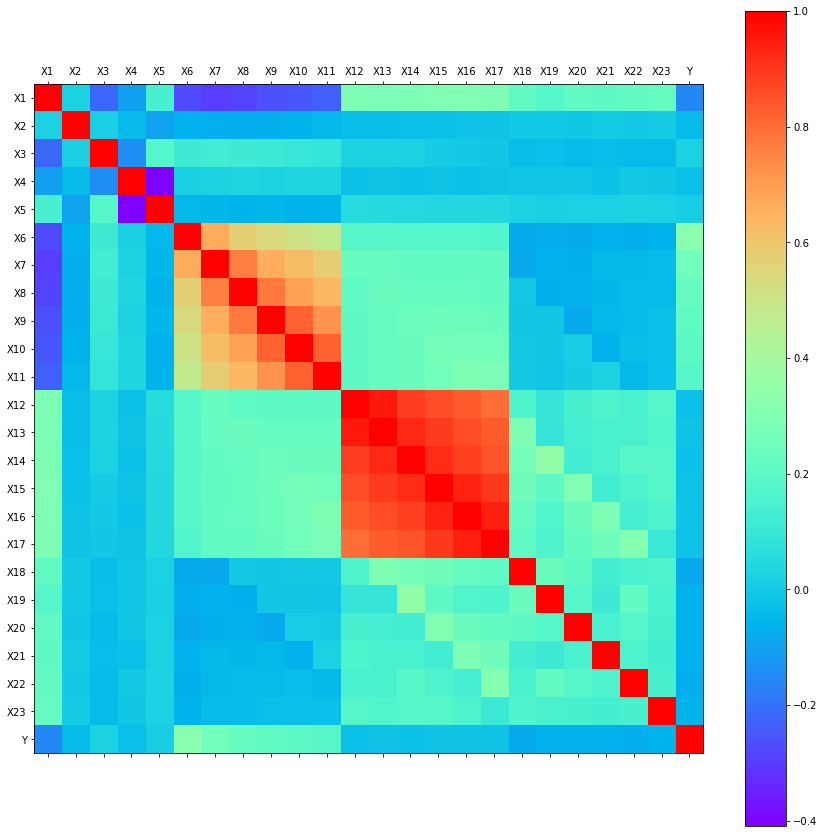

In [21]:
# next we check the correlation between features
# it is important to know the correlation among them since high correlation 
# may have bad influence to machine leanring models

def plot_corr(df,size=15):
    corr = df.corr() # calculate correlation matrix using pandas dataframe's corr() method
    fig, ax = plt.subplots(figsize=(size, size)) # setup a "canvas" with size as a parameter to make plots on it
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow')) # plot the matrix of correlation coefficient 
    plt.xticks(range(len(corr.columns)), corr.columns) # give the ticks on the x axis some names
    plt.yticks(range(len(corr.columns)), corr.columns) # give the ticks on the y axis some names
    plt.colorbar(cax) # plot the color bar
plot_corr(train_data) # now call the function we just defined 


iii. Check the pattern of the label
    * we want to know if the label set is balanced or not
    * if it is imbalance, we would like to address the issue and adjust our model accordingly

([<matplotlib.axis.XTick at 0x1b5d94109d0>,
 [Text(0, 0, ''), Text(0, 0, '')])

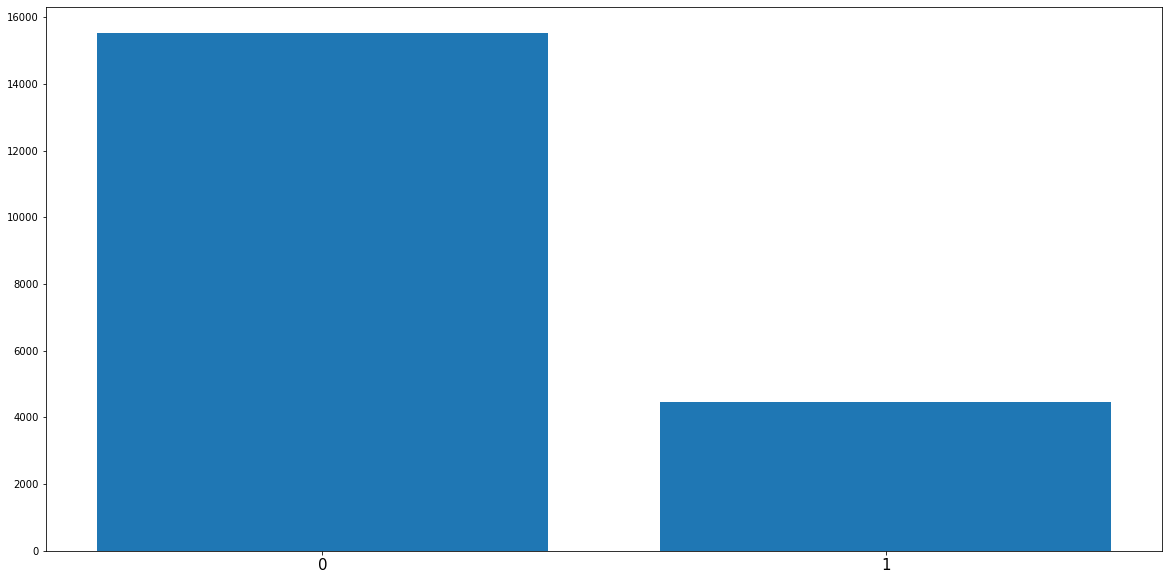

In [22]:
# check the ratio of between the target labels

fig = plt.figure(figsize=(20,10)) # setup the "canvas"
plt.bar(train_data['Y'].value_counts().index, train_data['Y'].value_counts().values) # same bar plot
plt.xticks(train_data['Y'].value_counts().index,fontsize=15) # give the ticks on the x axis some names

### Method to deal with imbalanced data
1. Choose a good metrics:  <br/> Confusion Matrix: recision/Recall/F1-score
2. Resampling Your Dataset:
  * add copies of instances from the under-represented class called over-sampling
  * use systematic algorithms to generate new instances: Synthetic Minority Over-sampling Technique
  * Delete instances from the over-represented class, called under-sampling
  * imbalanced-learn package: https://github.com/scikit-learn-contrib/imbalanced-learn
3. Tune the class weight parameter

## 4. Build a baseline model-Random Forest Classifier
* A baseline model is a good indicator for us to understand how a model would perform in the current situation
* We want the baseline model tell us two main things
    * Whether the features are overall okay for a predictive analysis purpose
    * How would a raw model perform on the current feature set

In [24]:
# build the baseline model real quick with all default parameters

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3}) # only set the class_weight to 1:3 to "match" the imbalanced label
RF = RF.fit(x_train, y_train) # make the model learn/fit/train
y_pred = RF.predict(x_test) # do prediction on the test data set
print (metrics.classification_report(y_test, y_pred)) # classification_report is a good format to get the result of a classifier model, it gives all the good stuff

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3923
           1       0.64      0.33      0.44      1077

    accuracy                           0.82      5000
   macro avg       0.74      0.64      0.66      5000
weighted avg       0.79      0.82      0.79      5000



## 5. Basic parameter tuning: Grid Searching
* After the raw model, we would like to tune the model a little bit to make it fit better
* Grid search is one of the ways to do this kind of job for us
* We give it a set of parameters and it will exaustively try every combination of the possible choices

In [25]:
# Do grid search to find the better parameter combination from a set of given choices
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est, # the estimator/machine learning model
                                     param_grid = param_grid, # parameter grid
                                     scoring = 'f1_weighted', # assign a scoring method 
                                     verbose = 10, # how much text output do we want during the searching process
                                     n_jobs = n_jobs, # the number of process we want to use for the searching job
                                     #iid = True, # independent identical distribution
                                     cv = cv) # number of folds of cross validation
    # Fit Grid Search Model
    model.fit(x_train, y_train)   # refit the model to the data
    return model

In [26]:
# this is the parameter choices we would like to try
param_grid = {'n_estimators':[100,300,500],        # In this case, n_estimators,criterion are the hyperparameters we would like to tune
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(X.values, Y.values, RandomForestClassifier(), param_grid, -1, 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [27]:
# check out the searching results(best hyperperameters: 'criterion'= entropy, 'n_estimators'=100)
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.cv_results_) 

Best score: 0.794
Best parameters set: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 300}
Scores: {'mean_fit_time': array([11.45829959, 32.34474988, 55.39379101, 16.72515507, 49.48809862,
       63.66291986]), 'std_fit_time': array([0.75489836, 1.22089751, 1.91871823, 0.63390372, 0.88403746,
       8.09796848]), 'mean_score_time': array([0.21281505, 0.68130255, 1.14031119, 0.23765812, 0.65388627,
       0.72733393]), 'std_score_time': array([0.00960658, 0.078086  , 0.09892346, 0.03475265, 0.06145949,
       0.1290662 ]), 'param_class_weight': masked_array(data=[{0: 1, 1: 3}, {0: 1, 1: 3}, {0: 1, 1: 3}, {0: 1, 1: 3},
                   {0: 1, 1: 3}, {0: 1, 1: 3}],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                   'entropy'],
             mask=[False, False, False, False, False, False],
       fill_va

In [28]:
roc_auc_scores = cross_val_score(RF, x_train, y_train, scoring ="roc_auc", cv = 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [29]:
np.mean(roc_auc_scores)

0.7704864317672828

## 6. Model Ensemble & Cross Validation
* The result from only one model could be biased or limited. 
* So sometime we would like to combine different models' results to make it a little more comprehensive
* use cross validation to evlauate the generalisation of the model

In [40]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)
sample_weights.shape

(20000,)

In [41]:
y_train.shape

(20000,)

In [37]:
# perform model ensemble
# take advantage of some different models, like differenct perspectives

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',class_weight = {0:1, 1:3}) # tuned random forest as our first one
clf2 = KNeighborsClassifier(n_neighbors=3) # K nearest neighbors with K equals to 3
clf3 = LogisticRegression (class_weight = {0:1, 1:3}) # logistic regression with class_weight
clf_xgb = XGBClassifier(sample_weight=compute_sample_weight(class_weight='balanced', y=y_train))

# we can use hard voting or soft voting method when ensemble our three models
eclf = VotingClassifier(estimators=[('Random_Forest',clf1), ('KNN', clf2),('Logistic', clf3),('xgb', clf_xgb)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, clf_xgb, eclf], ['Random_Forest', 'KNN','Logistic', 'xgb','Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=3, scoring='f1_weighted') # In this case, we use 3-fold cross validation
    print ("f1_score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

f1_score: 0.79 (+/- 0.00) [Random_Forest]
f1_score: 0.71 (+/- 0.00) [KNN]
f1_score: 0.70 (+/- 0.02) [Logistic]
[17:02:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:02:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:02:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Param

In [42]:
for clf, label in zip([clf1, clf2, clf3, clf_xgb, eclf], ['Random_Forest', 'KNN','Logistic', 'xgb','Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=3, scoring='roc_auc') # In this case, we use 3-fold cross validation
    print ("roc_auc_score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

roc_auc_score: 0.76 (+/- 0.00) [Random_Forest]
roc_auc_score: 0.59 (+/- 0.01) [KNN]
roc_auc_score: 0.65 (+/- 0.01) [Logistic]
[17:06:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:06:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:06:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner

In [43]:
clf1 = clf1.fit(x_train, y_train) 
y_pred = clf1.predict(x_test) 
print("Report for Random Forest")
print (metrics.classification_report(y_test, y_pred)) # classification_report for Random Forest

Report for Random Forest
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3923
           1       0.63      0.34      0.44      1077

    accuracy                           0.81      5000
   macro avg       0.73      0.64      0.66      5000
weighted avg       0.79      0.81      0.79      5000



In [44]:
clf2 = clf2.fit(x_train, y_train) 
y_pred = clf2.predict(x_test) 
print("Report for KNN")
print (metrics.classification_report(y_test, y_pred)) # classification_report for KNN

Report for KNN
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      3923
           1       0.34      0.21      0.26      1077

    accuracy                           0.74      5000
   macro avg       0.57      0.55      0.55      5000
weighted avg       0.70      0.74      0.72      5000



In [45]:
clf3 = clf3.fit(x_train, y_train) 
y_pred = clf3.predict(x_test) 
print("Report for Logistic Regression")
print (metrics.classification_report(y_test, y_pred)) # classification_report for Logistic Regression

Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3923
           1       0.36      0.36      0.36      1077

    accuracy                           0.72      5000
   macro avg       0.59      0.59      0.59      5000
weighted avg       0.72      0.72      0.72      5000



In [46]:
clf_xgb  = clf_xgb .fit(x_train, y_train) 
y_pred = clf_xgb.predict(x_test) 
print("Report for XGBoost")
print (metrics.classification_report(y_test, y_pred)) # classification_report for XGBoost

[17:08:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Report for XGBoost
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3923
           1       0.62      0.35      0.44      1077

    accuracy                           0.81      5000
   macro avg       0.73      0.64      0.67      5000
weighted avg       0.79      0.81      0.79      5000



In [47]:
eclf = eclf.fit(x_train, y_train) 
y_pred = eclf.predict(x_test) 
print("Report for Ensemble Model")
print (metrics.classification_report(y_test, y_pred)) # classification_report for Ensemble Model

[17:08:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Report for Ensemble Model
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3923
           1       0.68      0.21      0.32      1077

    accuracy                           0.81      5000
   macro avg       0.75      0.59      0.60      5000
weighted avg       0.79      0.81      0.77      5000



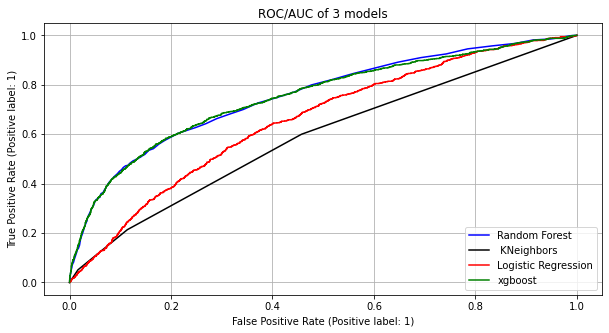

In [48]:
# Plot ROC_AUC curve of 3 models
 
fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(clf1, x_test, y_test,ax=ax, color="blue",label='Random Forest')
plot_roc_curve(clf2, x_test, y_test,ax=ax, color="black",label=' KNeighbors')
plot_roc_curve(clf3, x_test, y_test,ax=ax, color="red",label='Logistic Regression')
plot_roc_curve(clf_xgb, x_test, y_test,ax=ax, color="green",label='xgboost')

plt.title('ROC/AUC of 3 models')
plt.grid()

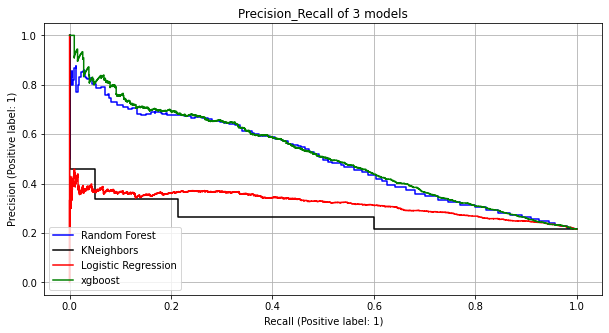

In [49]:
# Compare 3 models' Precision_recall curves

fig,ax=plt.subplots(figsize=(10,5))

plot_precision_recall_curve(clf1, x_test, y_test, ax=ax,color="blue",label='Random Forest')
plot_precision_recall_curve(clf2, x_test, y_test, ax=ax,color="black",label='KNeighbors')
plot_precision_recall_curve(clf3, x_test, y_test, ax=ax,color="red",label='Logistic Regression')
plot_precision_recall_curve(clf_xgb, x_test, y_test, ax=ax,color="green",label='xgboost')

plt.title('Precision_Recall of 3 models')
plt.grid()

## Model Recommendation
We recommend recall = 0.8, however, the threshold can be adjusted to reach higher recall.

In [62]:
# Compute precision, recall and threshold of Random Forest

y_predict_rf = clf1.predict_proba(x_test)
y_scores_rf = y_predict_rf[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_rf)

recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
precision_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

thresholds = np.append(thresholds, 1)

recalls_80, precision_80, threshold_80_recall

(0.7985143918291551, 0.31284103310294653, 0.13849999999999998)

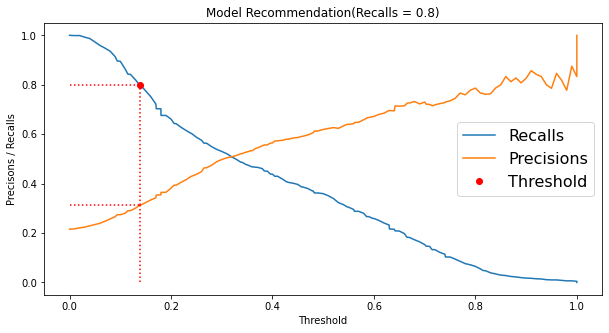

In [63]:
# Plot recommended recall = 0.8

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(thresholds, recalls, label='Recalls')
ax.plot(thresholds, precisions, label='Precisions')

ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recalls_80], "r:" )
ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
ax.plot([0, threshold_80_recall], [recalls_80, recalls_80], "r:")
ax.plot([threshold_80_recall], [recalls_80], "ro", label='Threshold')

ax.set_xlabel('Threshold')
ax.set_ylabel('Precisons / Recalls')
ax.legend(loc='center right',fontsize=16)
plt.title('Model Recommendation(Recalls = 0.8)')
plt.savefig('recommended_recall')
plt.show()

## Feature Importance

Text(0.5, 1.0, 'Features importance')

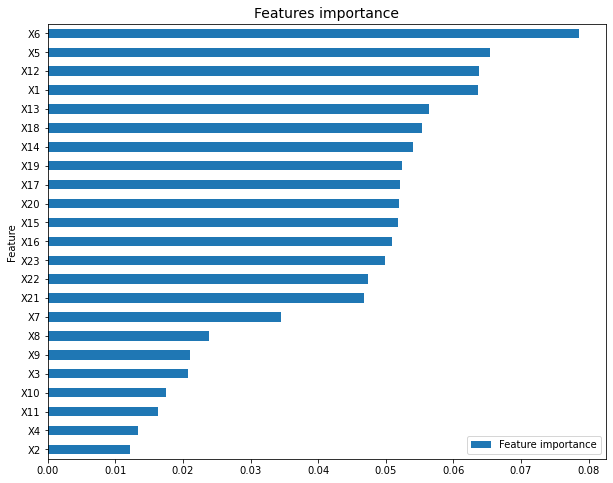

In [69]:
# Plot feature importance of winner model - Random Forest
feature_cols = x_train.columns.tolist()

fea_df = pd.DataFrame({'Feature': feature_cols, 'Feature importance': clf1.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

'Past month's payment status' and 'Age' are the strongest predictors of future payment default risk

## Conclusion
* Logistic Regression model has the highest recall but the lowest precision, if the business cares recall the most, then this model is the best candidate. 
* If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. Since Random Forest has slightly lower recall but much higher precision than Logistic Regression, I would recommend Random Forest.
* If we need to adjust our threshold according to different ecnomic situations, then we the Random Forest model is best, since it has the best AUC-ROC score.